In [1]:
import sys
import os

from global_settings import days_type

sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
from pyarrow import table

import volpy_func_lib as vp
import load_clean_lib
import table_lib
import vol_strat_lib as vs
import volpy_func_ticker_lib as vtp
from global_settings import *
import option_returns as orpy
from volpy_func_lib import return_df

importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)
days_type()

't_'

In [2]:
importlib.reload(vtp)
orpy_df = vtp.concat_ticker_datasets(vp.VIX_tickers, "sum1")

Skipped 1/15 tickers: ['RUT']


In [3]:
orpy_df["r_stock"] = 0

In [4]:
importlib.reload(vp)
df = vp.make_df_strats(orpy_df, sgy_common = "r_D_30_", sign=False, sgy_names = [], scale = False, plot = False, ticker_list=None, extra_columns = ["SW_0_30", "#K", "SW_0_30_linear"], vol_index = True) #, sgy_names = None

In [5]:
(df["VXD"]**2).min()

0.0007344099999999999

In [6]:
# Table
importlib.reload(table_lib)
results_df = table_lib.vix_table(df)
table_lib.latex_vix_table(results_df)

In [8]:
# # Latex code for Figures (appendix)
importlib.reload(table_lib)
table_lib.generate_latex_for_pairs(orpy_df)

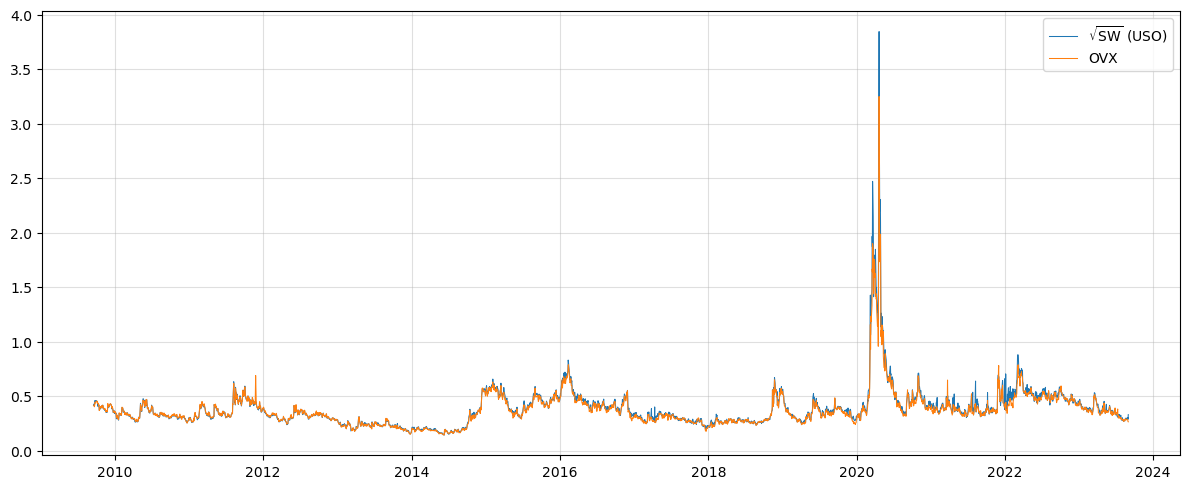

In [153]:
importlib.reload(vp)
vp.plot_ticker_SW_vs_vix(df, "USO", figsize=(12, 5), show_fig = True, save_fig = True, filename_suffix = "stretched")

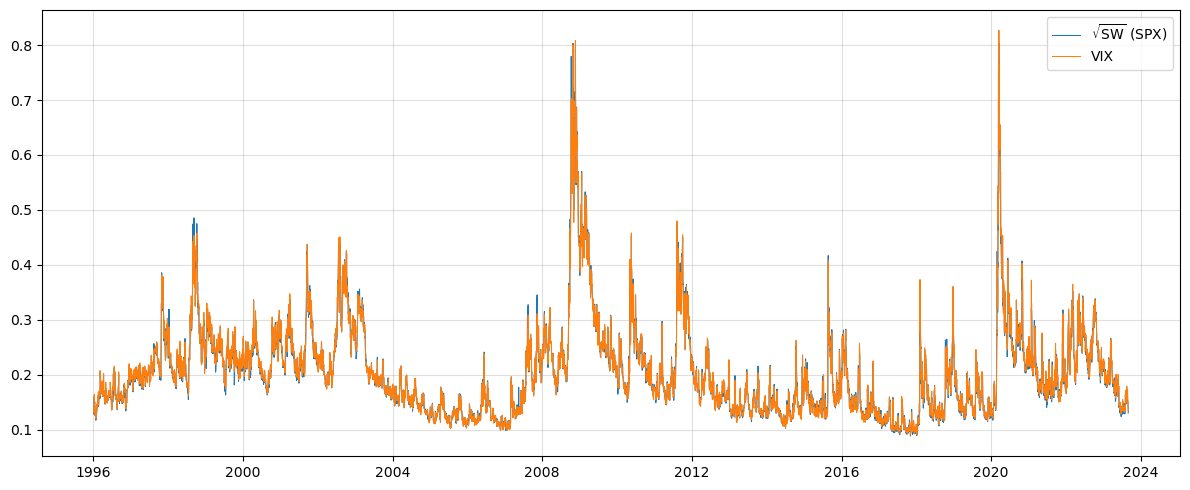

In [154]:
importlib.reload(vp)
vp.plot_ticker_SW_vs_vix(df, "SPX", figsize=(12, 5), show_fig = True, save_fig = True, filename_suffix = "stretched")

In [155]:
# # VIX figures
importlib.reload(vp)
df = vp.make_df_strats(orpy_df, sgy_common = "r_D_30_", sign=False, scale = False, plot = False, ticker_list=None, extra_columns = ["SW_0_30"], sgy_names = [], vol_index = True) #, sgy_names = None

save_fig = True
show_fig = False

# Level
importlib.reload(vp)
for ticker in orpy_df["ticker"].unique():
    vp.plot_ticker_SW_vs_vix(df, ticker, figsize=(9, 5), show_fig = show_fig, save_fig = save_fig)

# Difference
importlib.reload(vp)
for ticker in orpy_df["ticker"].unique():
    vp.plot_ticker_SW_minus_vix(df, ticker, figsize=(9, 5), show_fig = show_fig, save_fig = save_fig)

# Scaled difference
importlib.reload(vp)
for ticker in orpy_df["ticker"].unique():
    vp.plot_ticker_SW_minus_vix_scaled(df, ticker, figsize=(9, 5), show_fig = show_fig, save_fig = save_fig)

In [160]:
orpy_df = vtp.concat_ticker_datasets(vp.VIX_tickers, "sum1")
orpy_df["r_stock"] = 0
df = vp.make_df_strats(orpy_df, sgy_common = "r_D_30_", sign=False, scale = False, plot = False, ticker_list=None, extra_columns = ["SW_0_30"], sgy_names = [], vol_index = True) #, sgy_names = None

df = df[df["VIX"].isna()==False]
df = df[df["ticker"] == "SPX"]
df = df[df["date"] <= pd.Timestamp("2003-02-28")]
print(df["SW_0_30"].mean(), (df["VIX"]**2).mean())

Skipped 1/15 tickers: ['RUT']
0.05875970625245745 0.05966489325917686


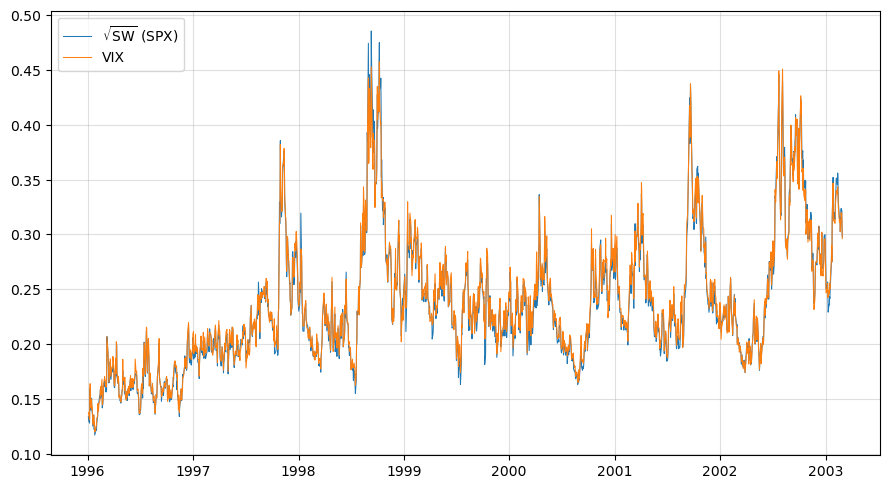

In [80]:
importlib.reload(vp)
df = vp.make_df_strats(orpy_df, sgy_common = "r_D_30_", sign=False, sgy_names = [], scale = False, plot = False, ticker_list=["SPX"], extra_columns = ["SW_0_30", "#K", "RV"], vol_index = True) #, sgy_names = None
df = df[df["date"] <= pd.Timestamp("2003-02-28")]


importlib.reload(vp)
vp.plot_ticker_SW_vs_vix(df, "SPX", figsize=(9, 5), show_fig = True, save_fig = True, filename_suffix = "CarrWu")
# 
# plt.figure(figsize=(10,5))
# plt.plot(df["date"], df["SW_0_30"], label="Swap rate")
# plt.plot(df["date"], df["VIX"]**2, label=r"VIX$^2$", alpha = 0.7)
# plt.legend()
# plt.tight_layout()
# plt.savefig("figures/vix/Swap_rate.pdf")
# plt.show()

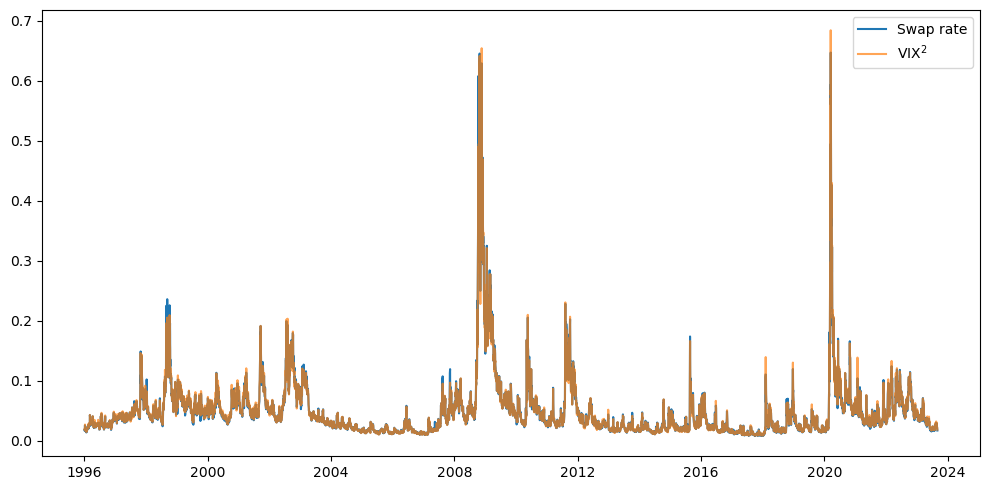

In [81]:
importlib.reload(vp)
df = vp.make_df_strats(orpy_df, sgy_common = "r_D_30_", sign=False, sgy_names = [], scale = False, plot = False, ticker_list=["SPX"], extra_columns = ["SW_0_30", "#K", "RV"], vol_index = True) #, sgy_names = None
# df = df[df["date"] <= pd.Timestamp("2003-02-28")]

plt.figure(figsize=(10,5))
plt.plot(df["date"], df["SW_0_30"], label="Swap rate")
plt.plot(df["date"], df["VIX"]**2, label=r"VIX$^2$", alpha = 0.7)
plt.legend()
plt.tight_layout()
# plt.savefig("")
plt.show()

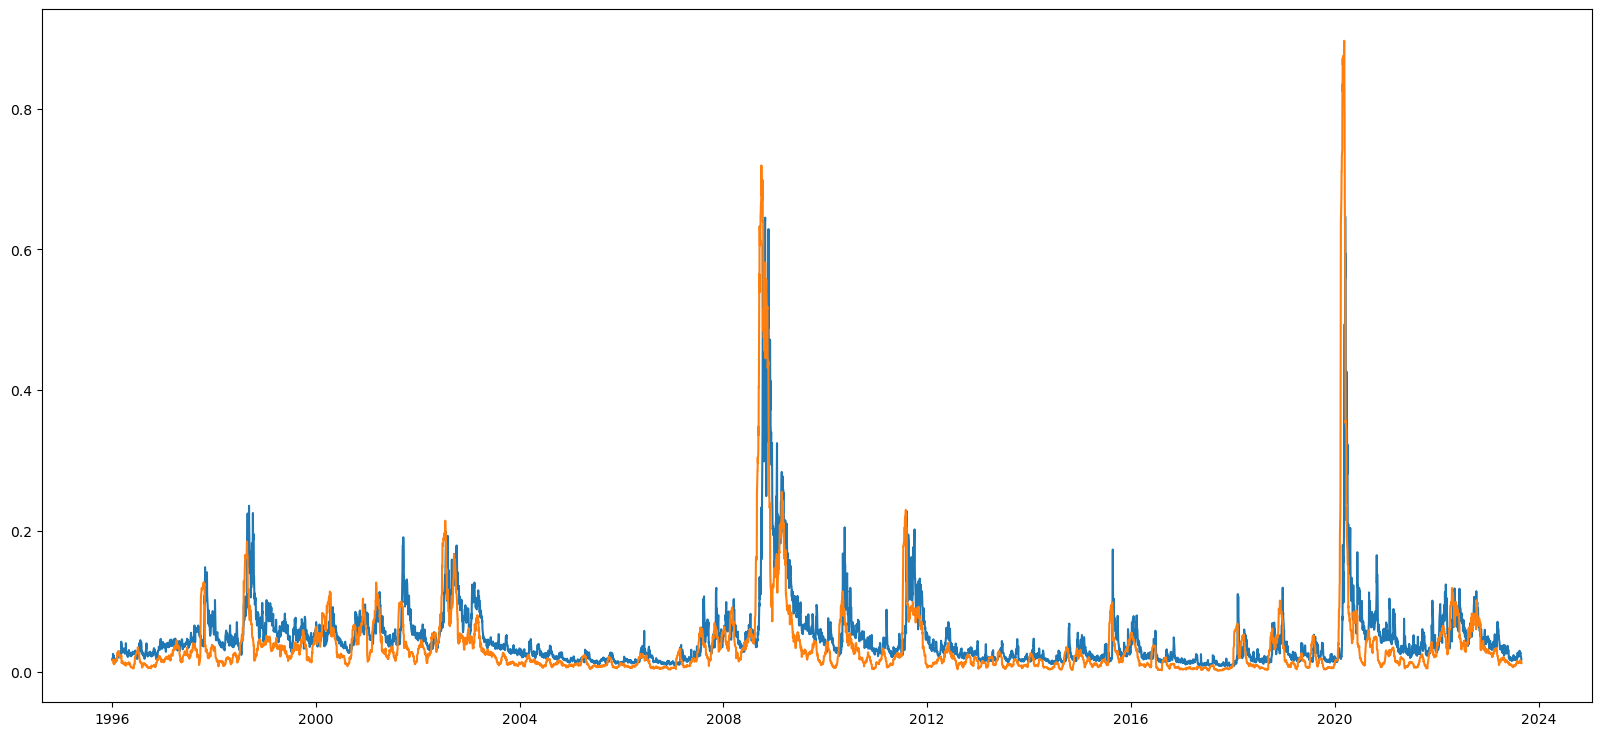

In [82]:
plt.figure(figsize=(20,9))

plt.plot(df["date"], df["SW_0_30"], label="Swap rate")
plt.plot(df["date"], df["RV"], label="Swap rate")